In [1]:
import os
import numpy as np
import pandas as pd
import time
import skimage.io as io
io.use_plugin('tifffile')
import glob
from skimage import morphology
import mahotas as mh
from skimage.filters import threshold_adaptive
from scipy.ndimage import distance_transform_edt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from skimage.measure import regionprops

from skimage.morphology import watershed
from skimage.feature import peak_local_max
from scipy import ndimage

In [2]:
#Set path
path='C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/'

# Specify shell directory
output='PunctaByShell/'
newpath = path+output

# Specify hull directory
hull_dir='Puncta/'
hullpath = path+hull_dir

In [3]:
##Load All_Hulls
All_Hulls=pd.read_csv(hullpath+"_All_Hulls.csv", index_col=False)

##Load All Shells
All_Shells=pd.read_csv(newpath+"_All_Hulls.csv", index_col=False).drop('Unnamed: 0', axis=1)

In [76]:
All_Hulls

,Well,Stack,Hull,Center_x,Center_y,Center_z,volume,integrated_GFP,mean_GFP,std_GFP,median_GFP,threshold_GFP
0,Well02,1,1,1281,163,12,735730,7.771534e+07,105.630245,3.862554,105.0,110.793831
1,Well02,1,2,1238,355,12,580976,7.842795e+07,134.993440,12.627055,135.0,153.940583
2,Well02,1,3,1034,342,12,426777,1.003308e+08,235.089508,41.378741,238.0,300.068111
3,Well02,1,4,1402,444,12,431162,5.195522e+07,120.500469,8.979566,120.0,133.469349
4,Well02,1,5,1568,489,12,309081,3.249815e+07,105.144454,3.618070,105.0,110.427104
5,Well02,1,6,1863,517,12,359213,3.760726e+07,104.693477,3.488487,104.0,109.232730
6,Well02,1,7,928,538,12,529449,5.658640e+07,106.877909,4.259448,107.0,113.389173
7,Well02,1,8,1721,622,12,1622658,1.704107e+08,105.019466,3.631905,105.0,110.447858
8,Well02,1,9,1145,636,12,926491,1.478424e+08,159.572383,50.624545,165.0,240.936818
9,Well02,1,10,809,848,12,3796217,4.341502e+08,114.363898,20.074488,108.0,138.111731


In [4]:
##Make figure from data

##Get all hullpaths
Hull_Paths = []

for index, row in All_Hulls.iterrows():

    well = row['Well']
    stack = row['Stack']
    target=str(well)+str('*_')+str(stack)+'_MMStack_Pos0.ome.tif'
    filelist = glob.glob(path+str(target))
    
    Hull_Paths.append(glob.glob(path+str(target)))
    
Hull_Paths[304:314]

[['C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments\\Well04_HeLa_PHD2-IDR_2_MMStack_Pos0.ome.tif'],
 ['C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments\\Well04_HeLa_PHD2-IDR_2_MMStack_Pos0.ome.tif'],
 ['C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments\\Well04_HeLa_PHD2-IDR_2_MMStack_Pos0.ome.tif'],
 ['C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments\\Well04_HeLa_PHD2-IDR_2_MMStack_Pos0.ome.tif'],
 ['C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments\\Well04_HeLa_PHD2-IDR_2_MMStack_Pos0.ome.tif'],
 ['C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments\\Well04_HeLa_PHD2-IDR_3_MMStack_Pos0.ome.tif'],
 ['C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments\\Well04_HeLa_PHD2-IDR_3_MMStack_Pos0.ome.tif'],
 ['C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments\\Well04_HeLa_PHD2-IDR_3_MMStack_Pos0.ome.tif'],
 ['C:/Users/David Brown/Document

In [5]:
##Get hullpath from dataframe and index
def getHullPath(dataframe, index):

    well = dataframe['Well'][index]
    stack = dataframe['Stack'][index]
    target=str(well)+str('*_')+str(stack)+'_MMStack_Pos0.ome.tif'
    
    return glob.glob(path+str(target))

In [6]:
getHullPath(All_Hulls, 308)[0]

'C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments\\Well04_HeLa_PHD2-IDR_2_MMStack_Pos0.ome.tif'

In [9]:
#load Hoechst and GFP stacks from .ome.tif files
def load_ome(ome_stack_file):

    #MMStack .ome.tif files load channel,z,y,x
    #Check file contains .ome.tif
    if '.ome.tif' in ome_stack_file:

        #Load the file
        im=io.imread(ome_stack_file)

        #Select Hoechst stack
        Hoechst_stack = im[0,:,:,:] #Hoechst Channel = 0
        GFP_stack = im[1,:,:,:]     #GFP Channel = 1
        
        #
        return [Hoechst_stack, GFP_stack]
        #return GFP_stack
        
    else:
        print 'this is not an ome.tif'

In [10]:
##Load tif from dataframe and index
[Hoechst_stack, GFP_stack] = load_ome(getHullPath(All_Hulls,34)[0])

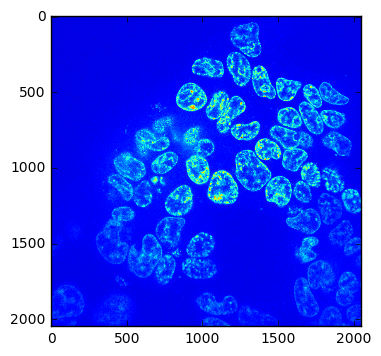

In [11]:
plt.imshow(Hoechst_stack[4])

In [100]:
All_Hulls.iloc[0]

Well                   Well02
Stack                       1
Hull                        1
Center_x                 1281
Center_y                  163
Center_z                   12
volume                 735730
integrated_GFP    7.77153e+07
mean_GFP               105.63
std_GFP               3.86255
median_GFP                105
threshold_GFP         110.794
Name: 0, dtype: object

In [12]:
#Generate crop coordinates from the pandas data frame for a given index
def crop_crds(dataframe, index):
    
    #crop_coords may exceed field of view

    #Use 'iloc' to query pd.df with an integer
    row=dataframe.iloc[index]

    #Calculate cropped image coordinates
    z = int(row['Center_z'])
    y_min = int(row['Center_y']-256)
    y_max = int(row['Center_y']+256)
    x_min = int(row['Center_x']-256)
    x_max = int(row['Center_x']+256)
    
    return (z, y_min, y_max, x_min, x_max)

In [14]:
z=10

In [15]:
##Load cropped tif from dataframe and index
# [Hoechst_stack, GFP_stack] = load_ome(getHullPath(All_Hulls,34)[0])
# [z, y_min, y_max, x_min, x_max] = crop_crds(All_Hulls,34)

plt.imshow(Hoechst_stack[z, y_min:y_max, x_min:x_max])

NameError: name 'y_min' is not defined

In [16]:
##Get image of Well02 Stack 2 Hull9 

#Use the pandas df.query function. Note that query() takes a string (defined by '') as an expression. 
#Also note the double quotes("") for the Well02 string
All_Hulls.query('Well == "Well02" and Stack == 2 and Hull == 9').index.values.astype(int)[0]

47

In [17]:
#Choice to image
def gimmeImage(dataframe, well, stack, hull):

    target=str(well)+str('*_')+str(stack)+'_MMStack_Pos0.ome.tif'
    
    glob.glob(path+str(target))
    
    [Hoechst_stack, GFP_stack] = load_ome(glob.glob(path+str(target))[0])
    
    ##Use boolean indexing for function
    index = dataframe[(dataframe['Well'] == well) & (dataframe['Stack'] == stack) & (dataframe['Hull'] == hull)].index.values.astype(int)[0]
    
    [z, y_min, y_max, x_min, x_max] = crop_crds(dataframe, index)
    
    plt.subplot(1,2,1), plt.imshow(Hoechst_stack[z, y_min:y_max, x_min:x_max], cmap='gray')
    plt.subplot(1,2,1), plt.axis('off')
    plt.subplot(1,2,1), plt.title('Hoechst')
    plt.subplot(1,2,2), plt.imshow(GFP_stack[z, y_min:y_max, x_min:x_max], cmap='gray')
    plt.subplot(1,2,2), plt.axis('off')
    plt.subplot(1,2,2), plt.title('GFP')

In [177]:
All_Hulls[(All_Hulls['Well'] == 'Well02') & (All_Hulls['Stack'] == 1) & (All_Hulls['Hull'] == 1)]

,Well,Stack,Hull,Center_x,Center_y,Center_z,volume,integrated_GFP,mean_GFP,std_GFP,median_GFP,threshold_GFP
0,Well02,1,1,1281,163,12,735730,77715340.0,105.630245,3.862554,105.0,110.793831


In [18]:
[z, y_min, y_max, x_min, x_max] = crop_crds(All_Hulls, 0)
print [z, y_min, y_max, x_min, x_max]

[12, -93, 419, 1025, 1537]


In [181]:
All_Hulls.iloc[3]

Well                   Well02
Stack                       1
Hull                        1
Center_x                 1281
Center_y                  163
Center_z                   12
volume                 735730
integrated_GFP    7.77153e+07
mean_GFP               105.63
std_GFP               3.86255
median_GFP                105
threshold_GFP         110.794
Name: 0, dtype: object

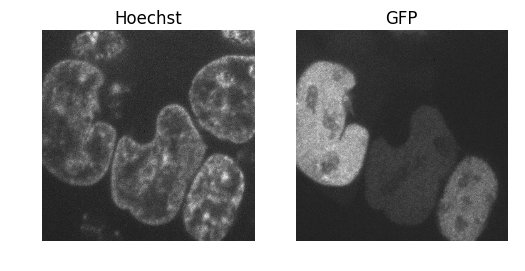

In [19]:
gimmeImage(All_Hulls, 'Well02', 1, 26)

C:\Users\David Brown\Anaconda2\lib\site-packages\matplotlib\axes\_base.py:3040: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  'bottom=%s, top=%s') % (bottom, top))


(<matplotlib.axes._subplots.AxesSubplot at 0x14c67e10>,
 <matplotlib.image.AxesImage at 0x14e73e80>)

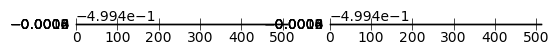

In [20]:
plt.subplot(1,2,1), plt.imshow(Hoechst_stack[21, y_min:y_max, x_min:x_max])
plt.subplot(1,2,2), plt.imshow(GFP_stack[21, y_min:y_max, x_min:x_max])

In [ ]:
## Compare volumes
f = plt.subplots(figsize=(5,5))

# sns.distplot(All_Hulls['volume'], hist=False)
# sns.distplot(All_Shells['volume'], hist=False)

sns.distplot(All_Hulls['volume'])
sns.distplot(All_Shells['volume'])

In [21]:
##Load All_Spots
Hull_Spots=pd.read_csv(hullpath+"_All_spots.csv", index_col=False).drop('Unnamed: 0', axis=1)

Shell_Spots=pd.read_csv(newpath+"_All_Spots.csv", index_col=False).drop('Unnamed: 0', axis=1)

In [22]:
Hull_Spots.head(20)

,Well,Stack,Hull,Center_x,Center_y,Center_z,volume,integrated_GFP,mean_GFP,std_GFP,...,std_Puncta_volume,Punctate,Puncta,Center_x_Puncta,Center_y_Puncta,Center_z_Puncta,volume_Puncta,mean_GFP_Puncta,integrated_GFP_Puncta,Construct
0,Well02,1,26,586,1522,12,4049703,7.535963e+08,186.086803,85.784578,...,NaN,True,1.0,356.0,1383.0,21.0,34.0,616.294118,20954.0,PHD2-IDR-PHD3
1,Well02,2,7,469,547,12,1138404,2.490973e+09,2188.127201,761.258244,...,378.074427,True,1.0,483.0,428.0,5.0,169.0,2706.940828,457473.0,PHD2-IDR-PHD3
2,Well02,2,7,469,547,12,1138404,2.490973e+09,2188.127201,761.258244,...,378.074427,True,2.0,480.0,437.0,4.0,181.0,2723.215470,492902.0,PHD2-IDR-PHD3
3,Well02,2,7,469,547,12,1138404,2.490973e+09,2188.127201,761.258244,...,378.074427,True,3.0,464.0,433.0,2.0,59.0,2013.000000,118767.0,PHD2-IDR-PHD3
4,Well02,2,7,469,547,12,1138404,2.490973e+09,2188.127201,761.258244,...,378.074427,True,4.0,490.0,444.0,4.0,138.0,2719.963768,375355.0,PHD2-IDR-PHD3
5,Well02,2,7,469,547,12,1138404,2.490973e+09,2188.127201,761.258244,...,378.074427,True,5.0,508.0,447.0,2.0,38.0,2200.263158,83610.0,PHD2-IDR-PHD3
6,Well02,2,7,469,547,12,1138404,2.490973e+09,2188.127201,761.258244,...,378.074427,True,6.0,516.0,451.0,8.0,400.0,2959.527500,1183811.0,PHD2-IDR-PHD3
7,Well02,2,7,469,547,12,1138404,2.490973e+09,2188.127201,761.258244,...,378.074427,True,7.0,475.0,457.0,3.0,117.0,2928.034188,342580.0,PHD2-IDR-PHD3
8,Well02,2,7,469,547,12,1138404,2.490973e+09,2188.127201,761.258244,...,378.074427,True,8.0,454.0,460.0,8.0,369.0,4076.796748,1504338.0,PHD2-IDR-PHD3
9,Well02,2,7,469,547,12,1138404,2.490973e+09,2188.127201,761.258244,...,378.074427,True,9.0,509.0,460.0,2.0,39.0,2369.538462,92412.0,PHD2-IDR-PHD3


KeyError: 'volume_Puncta'

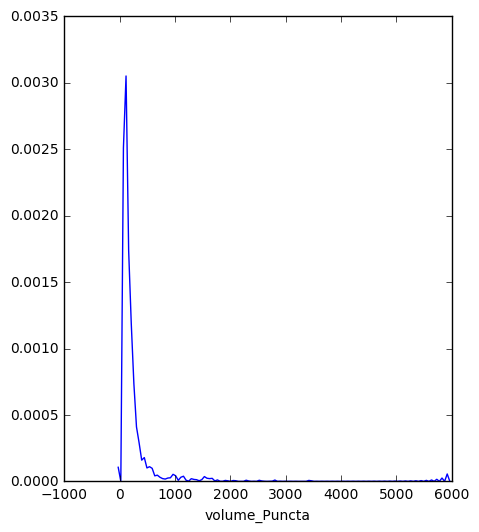

In [23]:
##Compare puncta volumes
f = plt.subplots(figsize=(5,6))

sns.distplot(Hull_Spots['volume_Puncta'], hist=False)
sns.distplot(Shell_Spots['volume_Puncta'], hist=False)

In [ ]:
##Can we add more data during the aggregation phase?
aggy2 = {'mean_GFP' : {'n_Puncta' : 'count',
                        'mean_Puncta_GFP': 'mean',
                          'std_Puncta_GFP' : 'std'
                      },
        'volume': {'mean_Puncta_volume': 'mean',
                  'std_Puncta_volume': 'std'}
        }

aggs2 = All_Spots.groupby(['Well', 'Stack', 'Hull']).agg(aggy2)

##Rename the columns to simplify referencing after merge
aggs2.columns=['std_Puncta_volume','mean_Puncta_volume','mean_Puncta_GFP','n_Puncta','std_Puncta_GFP']

#Reorder the columns
aggs2=aggs2[[3,2,4,1,0]]
aggs2